# **Cantidad pedida**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Modelos de inventarios.xlsx",sheet_name="M_sin_preparación")
data

,c,h,p,x,mu,sigma,cantidad_pedido,reorden
0,30,25,45,0,300,20,284,3063.24
1,46,16,80,0,255,30,244,2644.86
2,41,33,63,0,279,43,247,2925.97
3,95,15,70,2,246,41,200,2589.65
4,31,12,85,0,330,17,332,3353.75
...,...,...,...,...,...,...,...,...
95,31,40,81,3,200,45,200,2142.30
96,29,45,92,1,231,17,229,2363.75
97,71,45,46,5,246,32,200,2561.19
98,36,44,59,1,313,38,284,3250.16


In [ ]:
data = data.dropna()

In [ ]:
features = np.asarray(data[["c","h","p","x","mu","sigma"]])
targets = np.asarray(data["cantidad_pedido"])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits = k, shuffle = True)
d_tree = DecisionTreeRegressor(max_depth= 15)

In [ ]:
# declarar un array para los precios predichos en cada iteración

all_predictions = np.zeros_like(targets)

for train_indices, test_indices in kf.split(features):
  train_features, test_features = features[train_indices], features[test_indices]
  train_targets, test_targets = targets[train_indices] , targets[test_indices]

  ## Entrenar el decision tree
  d_tree.fit(train_features,train_targets)

  ## Predecir usando el modelo
  predictions = d_tree.predict(test_features)

  ## Ponemos las predicciones en el array de all_predictions creado above
  all_predictions[test_indices] = predictions


## Evaluamos el modelo usando la diferencia de medianas de todas las predicciones realizadas
eval_model = np.median(np.abs(all_predictions - targets))
eval_model

11.0

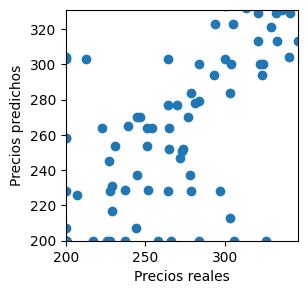

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (3,3))
plt.scatter(targets, all_predictions)
plt.xlim(200,targets.max())
plt.ylim(200,predictions.max())
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.show()

In [ ]:
test_features

array([[ 41,  33,  63,   0, 279,  43],
       [ 45,  46,  82,   0, 218,  20],
       [  9,  37,  57,   2, 273,  15],
       [ 30,  41,  98,   2, 253,  33],
       [ 65,  32,  83,   3, 223,  39],
       [ 30,  19,  86,   1, 275,  23],
       [ 18,  17,  99,   2, 324,  43],
       [ 93,  35,  61,   0, 320,  42],
       [ 37,  34,  74,   2, 336,  37],
       [ 74,  10,  90,   0, 338,  33],
       [ 66,  50,  76,   1, 330,  19],
       [ 89,  43,  55,   1, 235,  34],
       [ 62,  10,  60,   0, 324,  24],
       [ 83,  19,  67,   0, 346,  45],
       [ 90,  15,  81,   2, 262,  44],
       [ 59,  48,  64,   1, 236,  21],
       [ 35,  46,  99,   2, 242,  37],
       [ 53,  49,  99,   2, 312,  39],
       [ 30,  40,  89,   2, 338,  23],
       [ 86,  25,  47,   3, 306,  40]])

In [ ]:
cop = d_tree.predict([[30,	25,	45,	0,	300,	20]])

In [ ]:
cop

array([284.])

# **Punto reorden**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Modelos de inventarios.xlsx",sheet_name="M_sin_preparación")
data

,c,h,p,x,mu,sigma,cantidad_pedido,reorden
0,30,25,45,0,300,20,284,3063.24
1,46,16,80,0,255,30,244,2644.86
2,41,33,63,0,279,43,247,2925.97
3,95,15,70,2,246,41,200,2589.65
4,31,12,85,0,330,17,332,3353.75
...,...,...,...,...,...,...,...,...
95,31,40,81,3,200,45,200,2142.30
96,29,45,92,1,231,17,229,2363.75
97,71,45,46,5,246,32,200,2561.19
98,36,44,59,1,313,38,284,3250.16


In [ ]:
data = data.dropna()

In [ ]:
features = np.asarray(data[["c","h","p","x","mu","sigma"]])
targets = np.asarray(data["reorden"])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits = k, shuffle = True)
d_tree = DecisionTreeRegressor(max_depth= 15)

In [ ]:
# declarar un array para los precios predichos en cada iteración

all_predictions = np.zeros_like(targets)

for train_indices, test_indices in kf.split(features):
  train_features, test_features = features[train_indices], features[test_indices]
  train_targets, test_targets = targets[train_indices] , targets[test_indices]

  ## Entrenar el decision tree
  d_tree.fit(train_features,train_targets)

  ## Predecir usando el modelo
  predictions = d_tree.predict(test_features)

  ## Ponemos las predicciones en el array de all_predictions creado above
  all_predictions[test_indices] = predictions


## Evaluamos el modelo usando la diferencia de medianas de todas las predicciones realizadas
eval_model = np.median(np.abs(all_predictions - targets))
eval_model

31.99000000000001

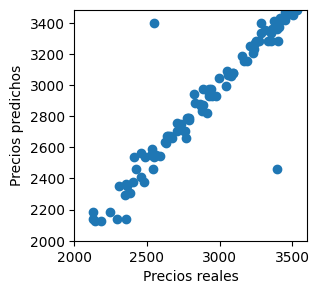

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (3,3))
plt.scatter(targets, all_predictions)
plt.xlim(2000,targets.max())
plt.ylim(2000,predictions.max())
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.show()

In [ ]:
test_features

array([[ 95,  15,  70,   2, 246,  41],
       [ 70,  10,  69,   2, 276,  41],
       [ 42,  29,  96,   1, 284,  28],
       [ 52,  18,  50,   3, 261,  45],
       [ 94,  31,  91,   1, 328,  42],
       [ 39,  24,  82,   0, 336,  28],
       [ 17,  12,  58,   2, 338,  16],
       [ 59,  39,  48,   3, 268,  33],
       [ 37,  34,  74,   2, 336,  37],
       [ 84,  38,  66,   3, 336,  18],
       [  8,  41,  81,   2, 313,  44],
       [  4,  41,  70,   0, 223,  25],
       [ 15,  17,  94,   3, 242,  21],
       [ 35,  46,  99,   2, 242,  37],
       [ 34,  22,  65,   0, 254,  42],
       [ 90,  44,  75,   0, 299,  22],
       [ 78,  11,  62,   3, 292,  39],
       [ 81,  26,  52,   0, 200,  41],
       [ 71,  45,  46,   5, 246,  32],
       [ 36,  44,  59,   1, 313,  38]])

In [ ]:
cop = d_tree.predict([[30,	25,	45,	0,	300,	20]])

In [ ]:
cop

array([3063.24])